The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


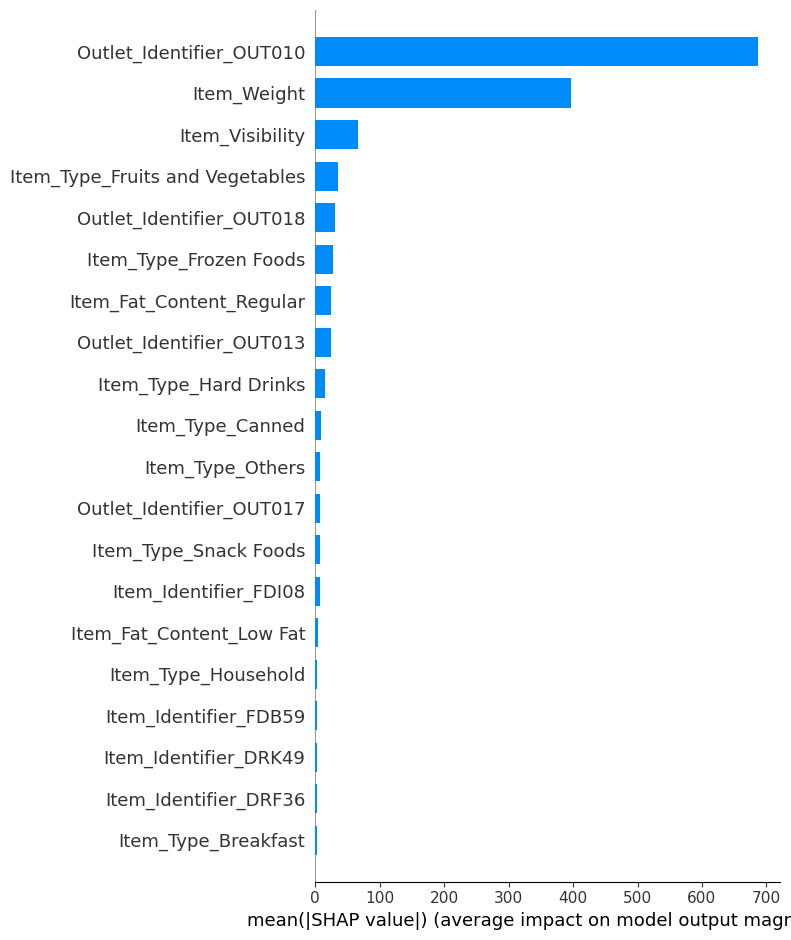

In [6]:
import pandas as pd
import joblib
import shap
from sklearn.model_selection import train_test_split

# Load the Random Forest model from the file
loaded_rf_model = joblib.load('random_forest_model.joblib')

# Reading Data
df = pd.read_csv("sales_predictions.csv")

# Fixing inconsistencies in categorical data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df = df.drop_duplicates()

# Features [X] & Target [y]
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split your data into train and test sets (if not already done in Part 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a sample of your training data for SHAP explanation
X_shap = shap.sample(X_train, 100)
y_shap = y_train[:100]  # Corresponding target values for the samples

# Create a model explainer
explainer = shap.Explainer(loaded_rf_model, X_shap)

# Calculate the shap values for your model
shap_values = explainer(X_shap)

# Create a summary plot - with plot_type='bar'
shap.summary_plot(shap_values, X_shap, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


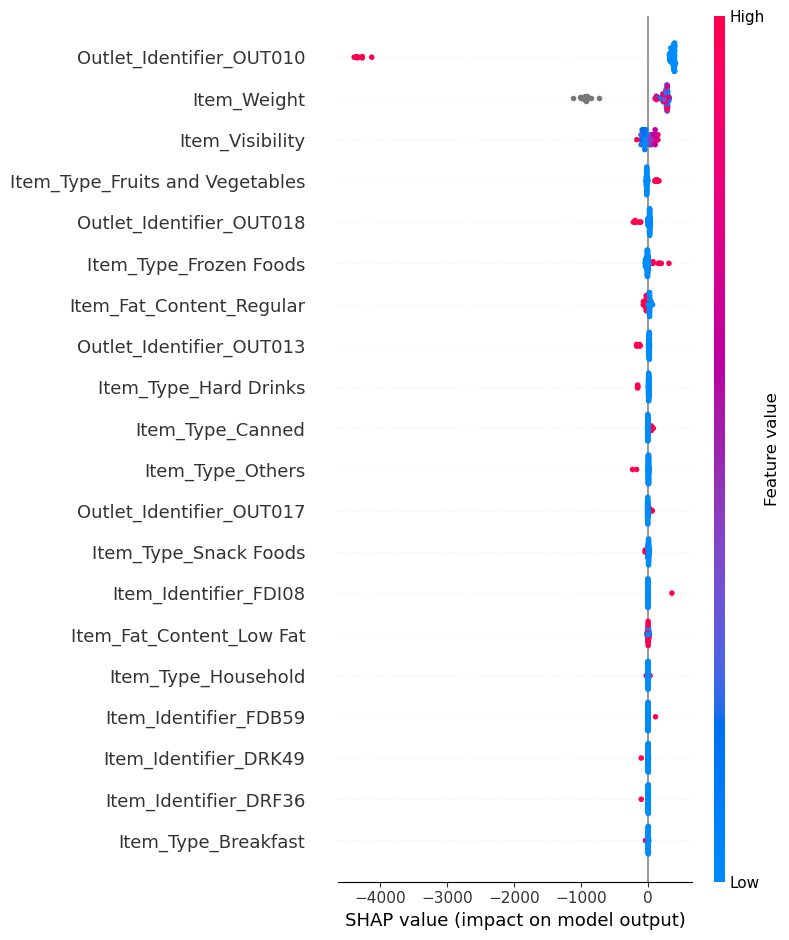

In [9]:
shap.summary_plot(shap_values, X_shap, plot_type='dot')

- **In the SHAP summary plot, the length of the bars shows how much each feature impacts the predictions of the model. Longer bars mean that the feature has a bigger effect on the predictions, while shorter bars mean it has a smaller effect.**

- For example, in your SHAP summary plot, the features "Outlet_Identifier_OUT010" and "Item_Weight" have longer bars, which means they have a stronger influence on the model's predictions. This means that changes in these features can lead to bigger changes in the predicted sales. On the other hand, the feature "Item_Type_Breakfast" has a shorter bar, which means it has a weaker influence on the predictions. Changes in this feature have a smaller impact on the predicted sales.

- **SHAP values give us more detailed insights into how each feature affects the model's predictions for individual data points. Positive SHAP values mean that a feature increases the model's prediction, while negative SHAP values mean it decreases the prediction. This information helps us understand the importance and direction of each feature's impact on the model's predictions.**

- Overall, SHAP values and the SHAP summary plot provide valuable information about the relationships between features and the target variable in the context of the model, helping us better understand how the model makes its predictions.

# Tabular

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
# Select examples with low sales
example_low_sales = df[df['Item_Outlet_Sales'] < df['Item_Outlet_Sales'].quantile(0.25)].head(1)

# Select examples with high sales
example_high_sales = df[df['Item_Outlet_Sales'] > df['Item_Outlet_Sales'].quantile(0.75)].head(1)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], verbose=True, mode='regression')

explanation_low_sales = explainer.explain_instance(example_low_sales.values[0], loaded_rf_model.predict, num_features=len(X_train.columns))
explanation_high_sales = explainer.explain_instance(example_high_sales.values[0], loaded_rf_model.predict, num_features=len(X_train.columns))

In [ ]:
explanation_low_sales.show_in_notebook(show_table=True, show_all=False)
explanation_high_sales.show_in_notebook(show_table=True, show_all=False)